## Zadanie 2 ##

Napisz program symulujący działanie maszyny Turinga o grafie przejść jak na Rys. 2 (zbiór stanów i alfabet
są takie, jakie wynikają z grafu). Symulujący, czyli pokazujący konfigurację maszyny w kolejnych krokach
(niekoniecznie graficznie). Umożliw podanie dowolnego wejścia (zgodnego z alfabetem).


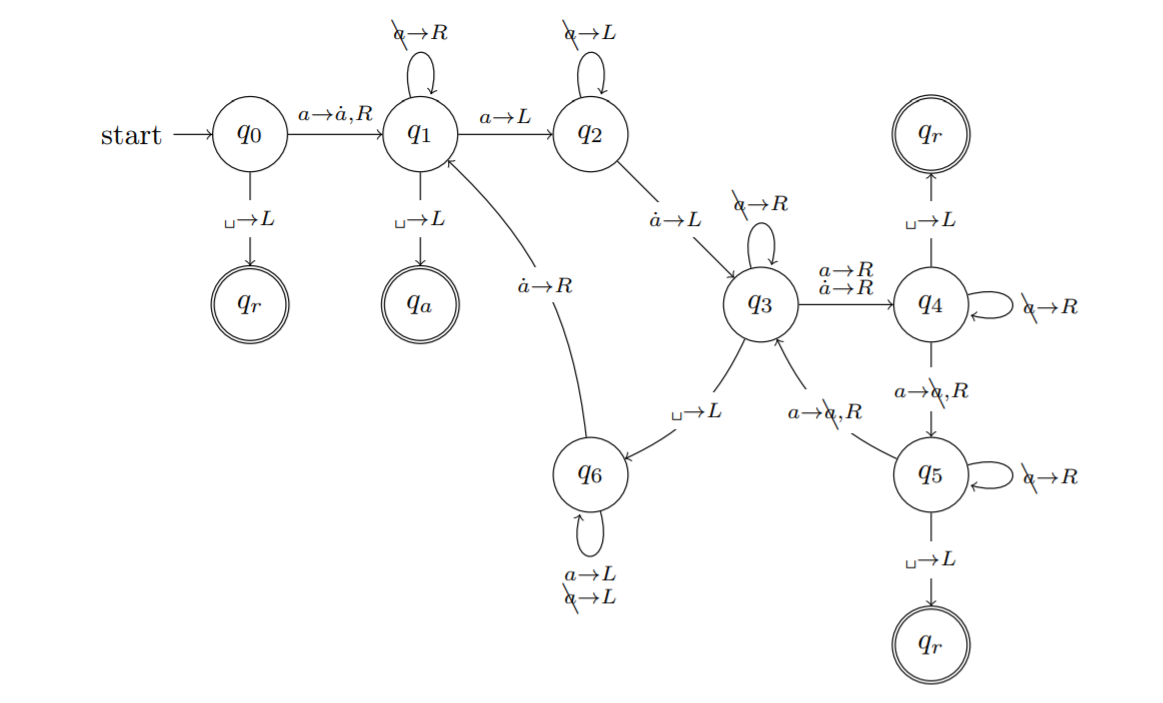

In [1]:
from IPython.display import Image
Image(filename='graph_2.png', height=300)

Reguły działania maszyny wyczytane z grafu zapisane są w słowniku a później wczytane do klasy reprezentującej
działanie danej MT.

In [2]:
graph_2 = {
            'q0': {
                ' ': {
                    '->': None,
                    'head': 'L',
                    'move': 'qr'
                },
                'a': {
                    '->': 'ä',
                    'head': 'R',
                    'move': 'q1'
                }
            },
            'q1': {
                ' ': {
                    '->': None,
                    'head': 'L',
                    'move': 'qa'
                },
                'a': {
                    '->': None,
                    'head': 'L',
                    'move': 'q2'
                },
                'A': {
                    '->': None,
                    'head': 'R',
                    'move': 'q1'
                }
            },
            'q2': {
                'A': {
                    '->': None,
                    'head': 'L',
                    'move': 'q2'
                },
                'ä': {
                    '->': None,
                    'head': 'L',
                    'move': 'q3'
                }
            },
            'q3': {
                'A': {
                    '->': None,
                    'head': 'R',
                    'move': 'q3'
                },
                'ä': {
                    '->': None,
                    'head': 'R',
                    'move': 'q4'
                },
                'a': {
                    '->': None,
                    'head': 'R',
                    'move': 'q4'
                },
                ' ': {
                    '->': None,
                    'head': 'L',
                    'move': 'q6'
                }
            },
            'q4': {
                'A': {
                    '->': None,
                    'head': 'R',
                    'move': 'q4'
                },
                ' ': {
                    '->': None,
                    'head': 'L',
                    'move': 'qr'
                },
                'a': {
                    '->': 'A',
                    'head': 'R',
                    'move': 'q5'
                }
            },
            'q5': {
                'A': {
                    '->': None,
                    'head': 'R',
                    'move': 'q5'
                },
                ' ': {
                    '->': None,
                    'head': 'L',
                    'move': 'qr'
                },
                'a': {
                    '->': 'A',
                    'head': 'R',
                    'move': 'q3'
                }
            },
            'q6': {
                'a': {
                    '->': None,
                    'head': 'L',
                    'move': 'q6'
                },
                'A': {
                    '->': None,
                    'head': 'L',
                    'move': 'q6'
                },
                'ä': {
                    '->': None,
                    'head': 'R',
                    'move': 'q1'
                }
            },
            'qr': None,
            'qa': None
        }

In [3]:

class StateMachine:
    def __init__(self, dict_graph):
        self.state = 'q0'
        self.position = None
        self.tape = None
        self.nodes = ['q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6']
        self.graph = dict_graph

    def go_left(self):
        if self.position > 0:
            self.position -= 1

    def go_right(self):
        if self.position == len(self.tape) - 1:
            self.tape.append(' ')
            self.position += 1
        else:
            self.position += 1

    def display(self):
        print(self.tape[:self.position] + [self.state] + self.tape[self.position:])

    def run_machine(self, input):
        self.tape = list(input)
        self.position = 0
        action = True

        while action is not None:
            self.display()
            action = self.graph[self.state][self.tape[self.position]]
            if action['->']:
                self.tape[self.position] = action['->']
            if action['head'] == 'R':
                self.go_right()
            else:
                self.go_left()
            self.state = action['move']
            if self.state == 'qa':
                print(self.state, ' - accepted')
                break
            elif self.state == 'qr':
                print(self.state, ' - rejected')
                break


In [6]:

Machine = StateMachine(graph_2)
Machine.run_machine('aaaaaaaaaaaaaaaaaaaaaaaaaaa')

['q0', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
['ä', 'q1', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
['q2', 'ä', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
['q3', 'ä', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
['ä', 'q4', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
['ä', 'A', 'q5', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
['ä', 'A', 'A', 'q3', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
['ä', 